In [14]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 13, 10

import plotly.graph_objs as go
from plotly.offline import iplot

In [112]:
df = pd.read_csv(r'data2\weather\seattleWeather_1948-2017.csv')
df = df[['DATE']+['TMIN']+['TMAX']]

In [113]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [114]:
df

,TMIN,TMAX
DATE,,
1948-01-01,42,51
1948-01-02,36,45
1948-01-03,35,45
1948-01-04,34,45
1948-01-05,32,45
...,...,...
2017-12-10,34,49
2017-12-11,29,49
2017-12-12,32,46


In [128]:
data = []
for i in df.columns:
    data.append(go.Scatter(
            x = df.index, y = df[i], name=i
            ))
    
data = data
layout = {'title': 'Data1'}

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [116]:
df.loc['1985-01-01':]

,TMIN,TMAX
DATE,,
1985-01-01,24,34
1985-01-02,26,40
1985-01-03,27,36
1985-01-04,26,41
1985-01-05,35,46
...,...,...
2017-12-10,34,49
2017-12-11,29,49
2017-12-12,32,46


In [119]:
df = df[df.columns].resample('MS').mean()

In [123]:
df

,TMIN,TMAX
DATE,,
1948-01-01,32.483871,43.548387
1948-02-01,32.620690,45.172414
1948-03-01,34.709677,51.096774
1948-04-01,37.300000,53.600000
1948-05-01,44.354839,61.387097
...,...,...
2017-08-01,59.000000,81.516129
2017-09-01,55.566667,73.800000
2017-10-01,45.290323,61.096774


In [126]:
df = df.iloc[400:797]

<AxesSubplot:xlabel='DATE'>

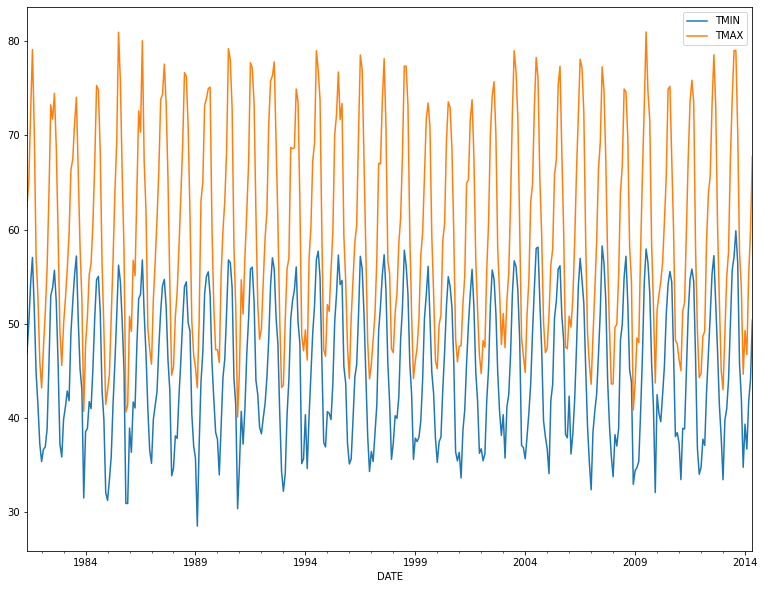

In [127]:
df.plot()

In [84]:
df["Daily minimum temperatures"] = df["Daily minimum temperatures"].apply(pd.to_numeric, errors='coerce')
df = df['Daily minimum temperatures'].resample('MS').mean()

In [85]:
df = df.to_frame()
df

,Daily minimum temperatures
Date,
1981-01-01,17.712903
1981-02-01,17.678571
1981-03-01,13.500000
1981-04-01,12.356667
1981-05-01,9.490323
...,...
1990-08-01,7.825806
1990-09-01,9.166667
1990-10-01,11.345161


In [86]:
df_conc = pd.concat([df, df,df], axis = 0)

In [87]:
df

,Daily minimum temperatures
Date,
1981-01-01,17.712903
1981-02-01,17.678571
1981-03-01,13.500000
1981-04-01,12.356667
1981-05-01,9.490323
...,...
1990-08-01,7.825806
1990-09-01,9.166667
1990-10-01,11.345161


<AxesSubplot:xlabel='Date'>

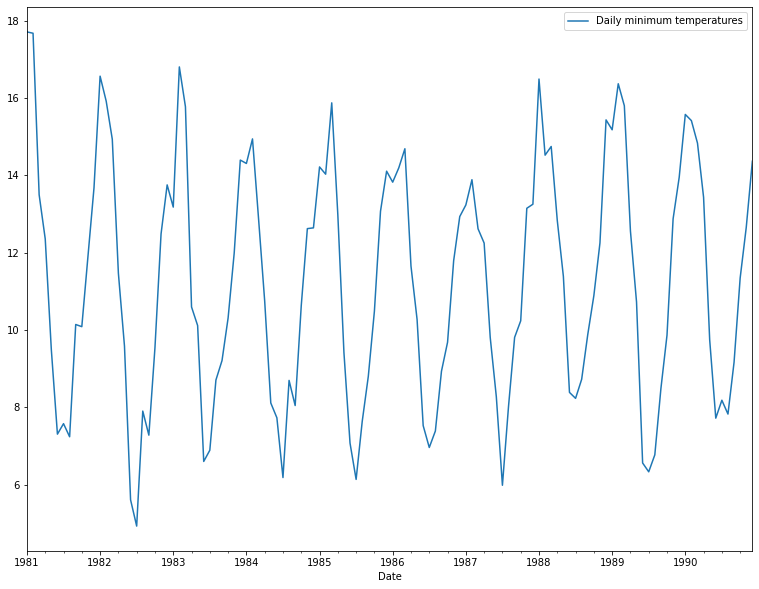

In [67]:
df.plot()

<AxesSubplot:xlabel='Date'>

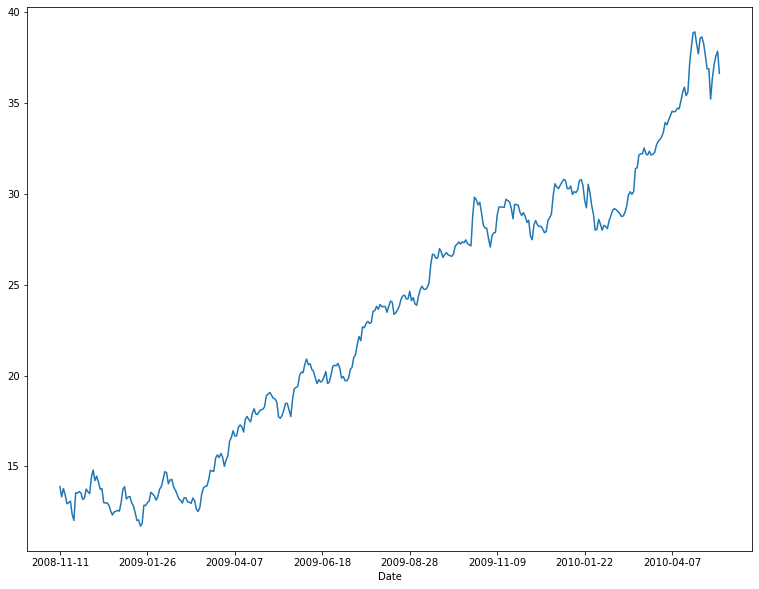

In [31]:
df['High'][720:1098].plot()

In [102]:
pd.date_range(start='1985-01-01', end ='2018-01-01', freq='MS')

DatetimeIndex(['1985-01-01', '1985-02-01', '1985-03-01', '1985-04-01',
               '1985-05-01', '1985-06-01', '1985-07-01', '1985-08-01',
               '1985-09-01', '1985-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', length=397, freq='MS')